In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import *
#from google.colab import files

# **Reading Data**

In [2]:
players = pd.read_excel('players (extension).xlsx', index_col = 0)

In [3]:
players.head()

,Name,Country,Current Rating,Potential Rating,Height (cm),Weight (kg),Preferred Foot,Birth Date,Age,Preferred Positions,...,FK Acc.,Penalties,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes,Specialities,Traits
0,Lionel Messi,Argentina,94,94,170,72,Left,"June 24, 1987",33,RW ST CF,...,94,75,88,14,6,11,15,8,"Dribbler, Distance Shooter, Crosser, FK Specia...","Finesse Shot, Long Shot Taker (CPU AI Only), S..."
1,Cristiano Ronaldo,Portugal,93,93,187,83,Right,"Feb. 5, 1985",35,ST LW,...,76,85,87,14,7,11,15,11,"Dribbler, Distance Shooter, Acrobat, Clinical ...","Power Free-Kick, Flair, Long Shot Taker (CPU A..."
2,Neymar Jr,Brazil,92,92,175,68,Right,"Feb. 5, 1992",28,LW CAM,...,89,92,87,15,9,9,15,11,"Speedster, Dribbler, Playmaker, Crosser, FK Sp...","Injury Prone, Flair, Speed Dribbler (CPU AI On..."
3,Virgil van Dijk,Netherlands,91,92,193,92,Right,"July 8, 1991",29,CB,...,70,62,45,11,13,10,13,11,"Tackling, Tactician, Strength, Complete Defender","Leadership, Long Passer (CPU AI Only), Power H..."
4,Jan Oblak,Slovenia,91,93,188,87,Right,"Jan. 7, 1993",27,GK,...,14,11,13,90,87,92,78,89,No,"GK Long Throw, Comes For Crosses"


In [4]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2940 entries, 0 to 2939
Data columns (total 57 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 2940 non-null   object
 1   Country              2940 non-null   object
 2   Current Rating       2940 non-null   int64 
 3   Potential Rating     2940 non-null   int64 
 4   Height (cm)          2940 non-null   int64 
 5   Weight (kg)          2940 non-null   int64 
 6   Preferred Foot       2940 non-null   object
 7   Birth Date           2940 non-null   object
 8   Age                  2940 non-null   int64 
 9   Preferred Positions  2940 non-null   object
 10  Player Work Rate     2940 non-null   object
 11  Weak Foot            2940 non-null   int64 
 12  Skill Moves          2940 non-null   int64 
 13  Value (€)            2940 non-null   int64 
 14  Wage (€)             2940 non-null   int64 
 15  Team                 2940 non-null   object
 16  Positi

# **Preprocessing**

In [5]:
players[['Current Rating', 'Potential Rating', 'Wage (€)', 'Value (€)']].corr()

,Current Rating,Potential Rating,Wage (€),Value (€)
Current Rating,1.000000,0.652683,0.675215,0.733450
Potential Rating,0.652683,1.000000,0.540412,0.690986
Wage (€),0.675215,0.540412,1.000000,0.847953
Value (€),0.733450,0.690986,0.847953,1.000000


In [6]:
# creating X-matrix and Y-vector
x = players.loc[:, ['Height (cm)', 'Weight (kg)', 'Age', 'Weak Foot', 'Skill Moves', 'Contract Length',
                    'Ball Control', 'Dribbling', 'Marking', 'Slide Tackle', 'Stand Tackle', 'Aggression', 'Reactions',
                    'Att. Position', 'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short Pass', 'Long Pass',
                    'Acceleration', 'Stamina', 'Strength', 'Balance', 'Sprint Speed', 'Agility',
                    'Jumping', 'Heading', 'Shot Power', 'Finishing', 'Long Shots', 'Curve', 'FK Acc.', 'Penalties',
                    'Volleys', 'GK Positioning', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Reflexes']].values.copy()
y = players.loc[:, 'Value (€)'].values.copy()

In [7]:
# normalization of the matrix X
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)

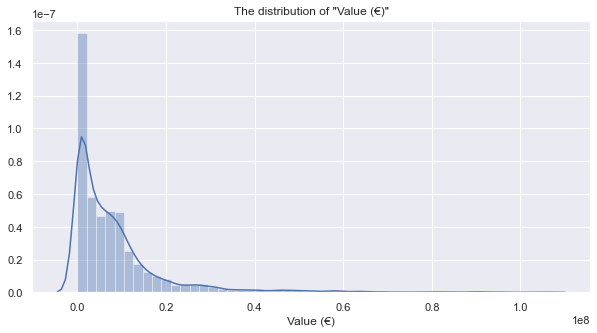

In [8]:
plt.figure(figsize = (10, 5))
sns.distplot(a = players['Value (€)'])
plt.title('The distribution of "Value (€)"')
plt.show()

In [9]:
# normalization of the vector Y
y = y / 1000000

# **Modeling**

In [10]:
# train, validation and test splits
x_train, x_val_test, y_train, y_val_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size = 0.5, random_state = 42)

In [11]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [12]:
print('rsqaure for train set:', r2_score(model.predict(x_train), y_train))
print('rsquare for val set', r2_score(model.predict(x_val), y_val))
print('rsquare for test set', r2_score(model.predict(x_test), y_test))

rsqaure for train set: 0.21865265939517065
rsquare for val set 0.39752897062147774
rsquare for test set 0.33884565781385534


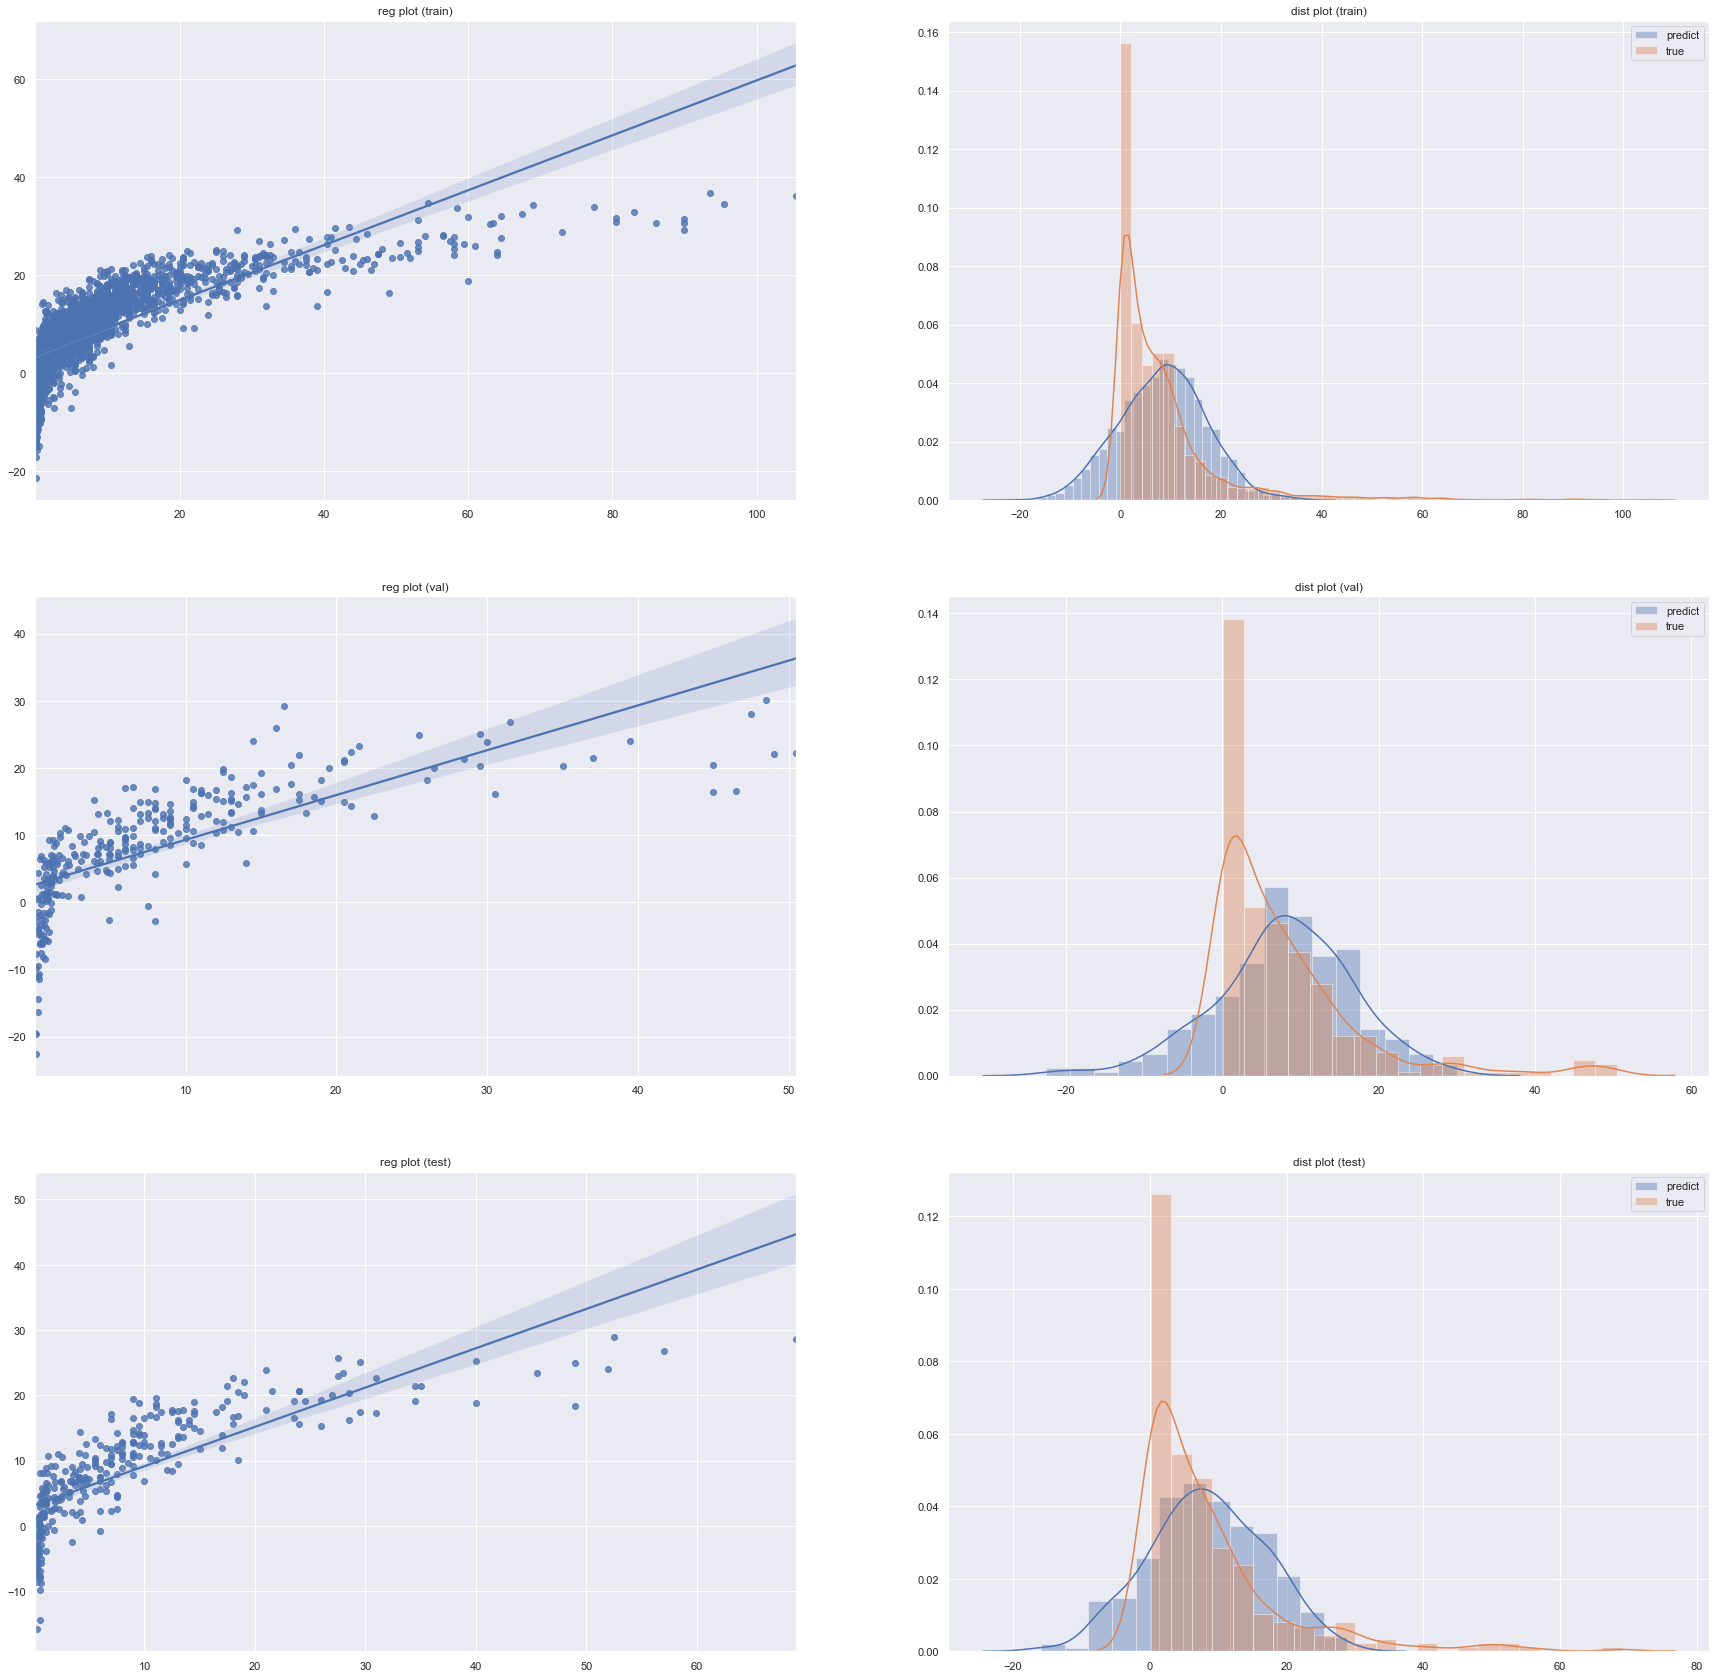

In [13]:
fig, ax = plt.subplots(3, 2, figsize = (30, 30))

# train
## regplot
sns.regplot(x = y_train, y = model.predict(x_train), ax = ax[0][0])
ax[0][0].set_title('reg plot (train)')
## distplot
sns.distplot(model.predict(x_train), label = 'predict', ax = ax[0][1])
sns.distplot(y_train, label = 'true', ax = ax[0][1])
ax[0][1].set_title('dist plot (train)')
ax[0][1].legend()

# val
## regplot
sns.regplot(x = y_val, y = model.predict(x_val), ax = ax[1][0])
ax[1][0].set_title('reg plot (val)')
## distplot
sns.distplot(model.predict(x_val), label = 'predict', ax = ax[1][1])
sns.distplot(y_val, label = 'true', ax = ax[1][1])
ax[1][1].set_title('dist plot (val)')
ax[1][1].legend()

# test
## regplot
sns.regplot(x = y_test, y = model.predict(x_test), ax = ax[2][0])
ax[2][0].set_title('reg plot (test)')
## distplot
sns.distplot(model.predict(x_test), label = 'predict', ax = ax[2][1])
sns.distplot(y_test, label = 'true', ax = ax[2][1])
ax[2][1].set_title('dist plot (test)')
ax[2][1].legend()

plt.show()